# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

    ## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [ ]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [ ]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

In [ ]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [ ]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

In [ ]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns
%matplotlib inline

In [4]:
data_json=pd.read_json('data/world_bank_projects.json')

In [10]:
country_project_df=pd.DataFrame(country_project)

In [11]:
country_project_df1=country_project_df.reset_index()

In [12]:
country_project_df1.columns=['Country_name','Project_count']

In [13]:
#The 10 countries with most projects
Top10=country_project_df1[:10]

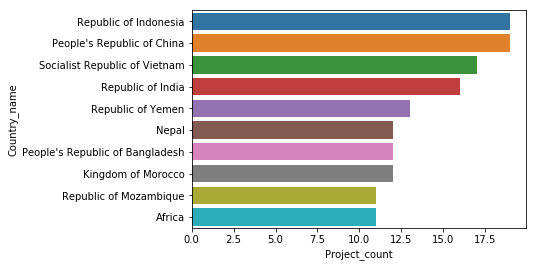

In [23]:
plot1 = sns.barplot(y="Country_name", x="Project_count", data=Top10)


In [24]:
mjtheme=pd.DataFrame(data_json[['mjtheme','mjtheme_namecode','mjthemecode']])

In [25]:
df=pd.DataFrame()

In [26]:
for i in mjtheme.mjtheme_namecode:
    df=df.append(json_normalize(i))

In [27]:
df['name'].replace('', np.nan, inplace=True)
df1=df.dropna()
df2=df1.drop_duplicates()

In [28]:
df3=df2.reset_index(drop=True)

In [29]:
df3_dict=dict(zip(df3.code,df3.name))

In [31]:
li=mjtheme.mjthemecode

In [32]:
mjtheme_name=[]

In [33]:
for code in li:
    value1=str.split(code,',')
    value2=list(set(value1))
    name=[]
    for i in value2:
        value3=df3_dict[i]
        name.append(value3)
    mjtheme_name.append(name)

In [34]:
#Updating theme names in the original dataframe
data_json['mjtheme_update']=mjtheme_name

In [35]:
theme_list = [item for sublist in mjtheme_name for item in sublist]

In [37]:
df4=df3

In [38]:
theme_list2=[]
for i in df4.name:
    count=theme_list.count(i)
    theme_list2.append(count)

In [39]:
df4['Count']=theme_list2

In [40]:
#Top 10 themes
Top10_themes=df4.nlargest(10,'Count')

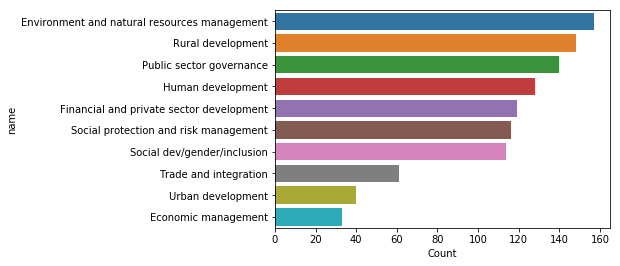

In [42]:
plot2 = sns.barplot(y="name", x="Count", data=Top10_themes)